In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

#### Loading the dataset

In [2]:
df = pd.read_csv('cwk_data_20549904.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,37,blue-collar,married,secondary,no,342,yes,no,cellular,12,340,2,175,1,failure,no
1,53,technician,divorced,secondary,no,392,yes,no,cellular,28,70,1,245,1,failure,no
2,59,unknown,married,unknown,no,3940,no,no,unknown,5,48,2,-1,0,unknown,no
3,31,blue-collar,single,secondary,no,334,yes,yes,unknown,2,425,2,-1,0,unknown,no
4,74,retired,married,tertiary,no,1843,no,no,cellular,15,192,1,185,2,success,yes


In [3]:
df.shape

(4000, 16)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4000 non-null   int64 
 1   job        4000 non-null   object
 2   marital    4000 non-null   object
 3   education  4000 non-null   object
 4   default    4000 non-null   object
 5   balance    4000 non-null   int64 
 6   housing    4000 non-null   object
 7   loan       4000 non-null   object
 8   contact    4000 non-null   object
 9   day        4000 non-null   int64 
 10  duration   4000 non-null   int64 
 11  campaign   4000 non-null   int64 
 12  pdays      4000 non-null   int64 
 13  previous   4000 non-null   int64 
 14  poutcome   4000 non-null   object
 15  y          4000 non-null   object
dtypes: int64(7), object(9)
memory usage: 500.1+ KB


#### Renaming the target column from 'y' to 'subscribed'

In [6]:
df = df.rename(columns={'y': 'subscribed'})
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,subscribed
0,37,blue-collar,married,secondary,no,342,yes,no,cellular,12,340,2,175,1,failure,no
1,53,technician,divorced,secondary,no,392,yes,no,cellular,28,70,1,245,1,failure,no
2,59,unknown,married,unknown,no,3940,no,no,unknown,5,48,2,-1,0,unknown,no


#### Null/ Missing data checks

In [7]:
df.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [8]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

### Thus, we can say that the data does not have any null or missing values.

#### Identifying and segregating numeric and categorical variables

In [9]:
df_numerical_features = df.select_dtypes(include='number')
print('Number of numeric features are:', df_numerical_features.shape[1])

Number of numeric features are: 7


In [10]:
df_categorical_features = df.select_dtypes(include='object')
print('Number of categorical features are:', df_categorical_features.shape[1])

Number of categorical features are: 9


#### Here, the categorical features include 8 input features and 1 output variable.

## 1. Data Summarization

#### Data summary for numeric features

In [11]:
summary_statistics = df.describe()
print(summary_statistics)

               age       balance          day     duration     campaign  \
count  4000.000000   4000.000000  4000.000000  4000.000000  4000.000000   
mean     41.116000   1342.140250    15.884000   297.713750     2.741250   
std      11.068431   2562.802639     8.470684   303.421575     3.066374   
min      18.000000  -1884.000000     1.000000     4.000000     1.000000   
25%      33.000000     84.000000     8.000000   114.000000     1.000000   
50%      39.000000    474.000000    16.000000   201.000000     2.000000   
75%      49.000000   1542.000000    22.000000   364.250000     3.000000   
max      92.000000  57435.000000    31.000000  3422.000000    36.000000   

            pdays    previous  
count  4000.00000  4000.00000  
mean     42.37775     0.61775  
std      99.04046     2.02612  
min      -1.00000     0.00000  
25%      -1.00000     0.00000  
50%      -1.00000     0.00000  
75%      -1.00000     0.00000  
max     595.00000    58.00000  


#### Exploratory Data Analysis

##### Target variable- No. of people subscribed the product

In [12]:
sns.set_palette('tab10')

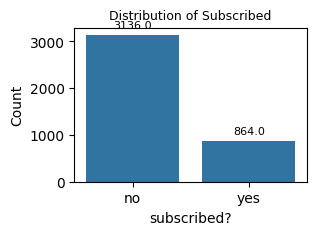

In [13]:
plt.figure(figsize=(3, 2))
ax = sns.countplot(x='subscribed', data=df)

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Subscribed',fontsize=9)
plt.xlabel('subscribed?')
plt.ylabel('Count')
plt.show()

#### Numeric input variables

1. Distribution of Age as per 'subscribed'

In [14]:
min_age = df['age'].min()
max_age = df['age'].max()

# Print the result
print(f"Age range: {min_age} - {max_age}")

Age range: 18 - 92


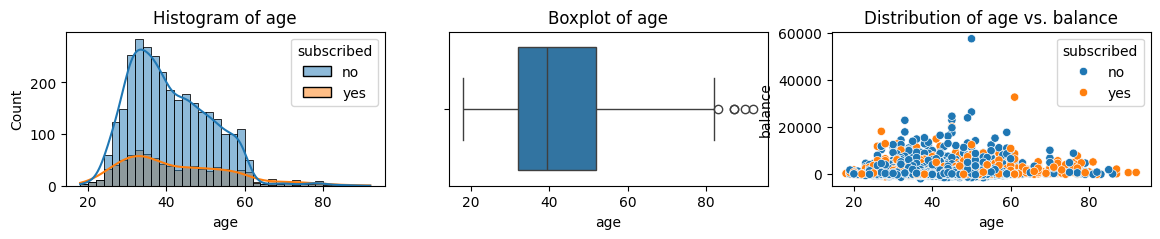

In [15]:
subscribed_data = df[df['subscribed'] == 'yes']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,2))

sns.histplot(data=df, x='age', hue='subscribed', color='blue',kde=True,ax=axes[0])
sns.boxplot(data=subscribed_data, x='age', ax=axes[1])
sns.scatterplot(data=df, x='age',y ='balance', hue='subscribed', ax=axes[2])

axes[0].set_title('Histogram of age')
axes[1].set_title('Boxplot of age')
axes[2].set_title('Distribution of age vs. balance')

plt.show()

In [16]:
subscribed_data.age.median()

39.5

##### The mean age is 41.116 and all the values range between 18 to 92. The majority of customers who have subscribed to the new product are between the ages of 30 to 50. The median age here is 39.5 years.

2. Distribution of balance as per 'subscribed'

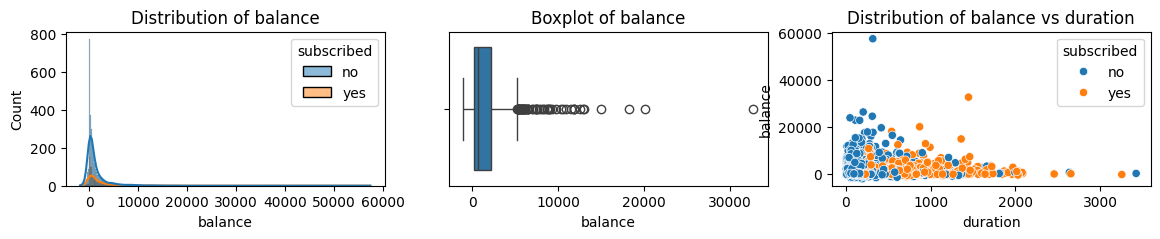

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,2))

sns.histplot(data=df, x='balance', hue='subscribed', color='blue',kde=True,ax=axes[0])
sns.boxplot(data=subscribed_data, x='balance', ax=axes[1])
sns.scatterplot(data=df, x='duration',y ='balance', hue='subscribed', ax=axes[2])

axes[0].set_title('Distribution of balance')
axes[1].set_title('Boxplot of balance')
axes[2].set_title('Distribution of balance vs duration')

plt.show()


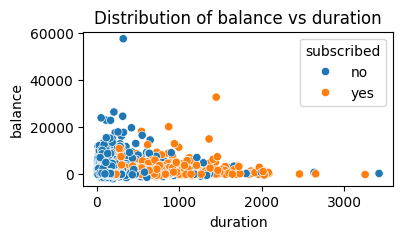

In [18]:
plt.figure(figsize=(4,2))
sns.scatterplot(data=df, x='duration',y ='balance', hue='subscribed')
plt.title('Distribution of balance vs duration')
plt.show()

In [19]:
df[df['balance'] > 10000].shape[0] #people have balance more than 5000.

59

##### The balance of customers is highly right skewed which is evident from the plots. Majority of people have balance less than 5,000. 

3. Distribution of duration as per 'subscribed'

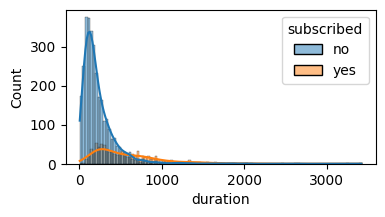

In [20]:
plt.figure(figsize=(4,2))
sns.histplot(data=df, x='duration', hue='subscribed', kde=True)
plt.show()

##### The duration data as well is highly right skewed.

#### Plotting remaining numerical features to understand their distribution:

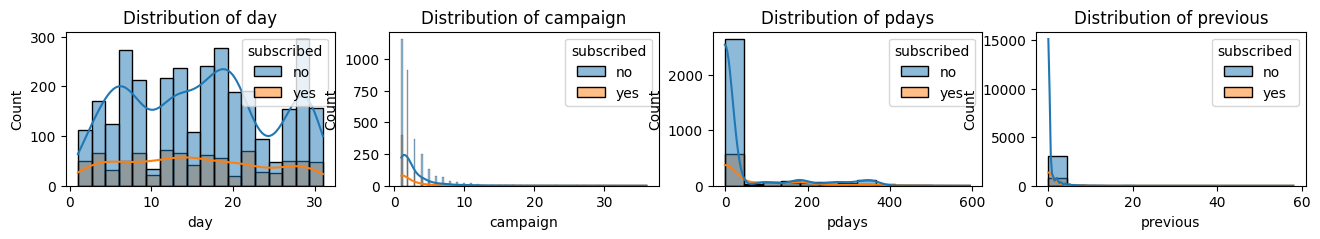

In [21]:
numerical_features = ['day', 'campaign', 'pdays', 'previous']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,2))

for i in range(len(numerical_features)):
    sns.histplot(x=numerical_features[i], hue='subscribed', data=df, kde=True,ax=axes[i])
    axes[i].set_title(f'Distribution of {numerical_features[i]}')

##### We can see that the 'day' data is well distributed while rest of the features are highly right skewed.

#### Categorical input variables:

1. Distribution of job as per 'subscribed'

In [22]:
df.job.nunique() #No. of unique jobs

12

In [23]:
df.job.value_counts()

job
management       874
blue-collar      820
technician       639
admin.           452
services         355
retired          229
self-employed    145
unemployed       134
entrepreneur     127
housemaid        113
student           87
unknown           25
Name: count, dtype: int64

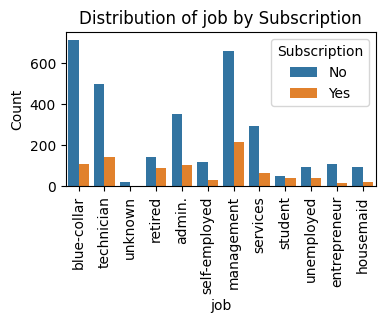

In [24]:
plt.figure(figsize = (4,2))
sns.countplot(x='job', hue='subscribed', data=df)
plt.title('Distribution of job by Subscription')
plt.xlabel('job')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Subscription', labels=['No', 'Yes'])

##### The people who work in management are the ones who have most likely subscribed to the new product.

2. Distribution of Marital

In [25]:
df.marital.value_counts()

marital
married     2389
single      1176
divorced     435
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='marital'>

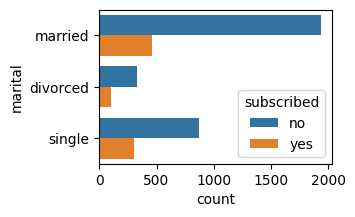

In [26]:
plt.figure(figsize=(3,2))
sns.countplot(data=df, y= df['marital'], hue='subscribed')

In [27]:
grouped_marital_balance = subscribed_data.groupby(['marital'])['balance']
grouped_marital_balance.agg(['mean','count'])

,mean,count
marital,,
divorced,1514.625000,104
married,1773.916667,456
single,1503.552632,304


##### Married and single people are more likely to subscribe to the product

3. Distribution of Education

<Axes: xlabel='count', ylabel='education'>

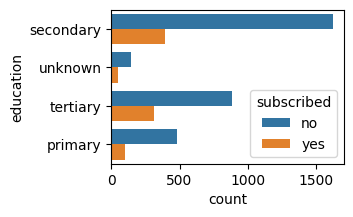

In [28]:
plt.figure(figsize=(3,2))
sns.countplot(data=df, y= df['education'], hue='subscribed')

In [29]:
df[df['subscribed'] == 'yes'].education.value_counts()*100/len(subscribed_data)

education
secondary    45.949074
tertiary     36.574074
primary      11.574074
unknown       5.902778
Name: count, dtype: float64

In [30]:
grouped_education_balance = subscribed_data.groupby(['education'])['balance']
grouped_education_balance.agg(['mean','count'])

,mean,count
education,,
primary,1397.930000,100
secondary,1424.171285,397
tertiary,1933.287975,316
unknown,2105.862745,51


##### Majority of people who subscribed have either secondary or tertiary education. Around 6% of people who subscribed, their education is unknown.

4. Distribution of default

In [31]:
df.default.value_counts()

default
no     3930
yes      70
Name: count, dtype: int64

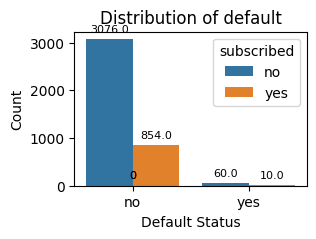

In [32]:
plt.figure(figsize=(3, 2))
ax = sns.countplot(x='default',hue='subscribed', data=df)

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of default')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.show()

In [33]:
subscribed_data = df[df['subscribed'] == 'yes']  #segregating people who have subscribed to product
subscribed_data.default.value_counts()*100/len(subscribed_data)

default
no     98.842593
yes     1.157407
Name: count, dtype: float64

In [34]:
grouped_default_balance = subscribed_data.groupby(['default'])['balance']
grouped_default_balance.agg(['min','max','mean','count'])

,min,max,mean,count
default,,,,
no,-779,32685,1669.772834,854
yes,-1042,327,-247.900000,10


In [35]:
grouped_default_balance = subscribed_data.groupby(['default'])['age']
grouped_default_balance.agg(['min','max','mean','count'])

,min,max,mean,count
default,,,,
no,18,92,42.583138,854
yes,27,48,35.000000,10


In [36]:
grouped_default_balance = subscribed_data.groupby(['default'])['duration']
grouped_default_balance.agg(['min','max','mean','count'])

,min,max,mean,count
default,,,,
no,34,3253,569.471897,854
yes,426,788,611.400000,10


##### Around 98.8% who subscribed do not have any default. However, among the remaining 1% of them have, who still subscribed, have an mean balance of -247.9 pounds, with average age around 35. The conversation with these 1% people have lasted for an average of 611.4s which is greater than the time devoted to people who were not defaulters and subscribed which was 569.47s.

5. Distribution of Housing

In [37]:
df.housing.value_counts()

housing
yes    2161
no     1839
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='housing'>

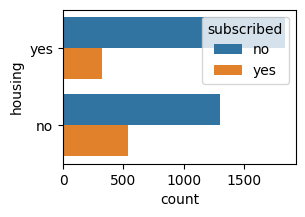

In [38]:
plt.figure(figsize=(3,2))
sns.countplot(data=df, y= df['housing'], hue='subscribed')

In [39]:
subscribed_data.housing.value_counts()*100/len(subscribed_data)  #Using previously created variable for people who have subscribed to product

housing
no     62.384259
yes    37.615741
Name: count, dtype: float64

In [40]:
grouped_loan_balance = subscribed_data.groupby(['housing'])['balance']
grouped_loan_balance.agg(['mean'])

,mean
housing,
no,1669.857143
yes,1610.627692


##### People with no housing loan are more likely to subscribe. However, around 37.6% people who have housing loan have still subscribed. They have a balance of 1610.62

6. Distribution Loan (personal loan)

In [41]:
df.loan.value_counts()

loan
no     3415
yes     585
Name: count, dtype: int64

In [42]:
subscribed_data.loan.value_counts()*100/len(subscribed_data)  #Using previously created variable for people who have subscribed to product

loan
no     90.972222
yes     9.027778
Name: count, dtype: float64

In [43]:
grouped_loan_balance = subscribed_data.groupby(['loan'])['balance']
grouped_loan_balance.agg(['mean'])

,mean
loan,
no,1708.352417
yes,1035.153846


##### Around 91% who have subscribed do not have any personal loan however, 9% of those who have loan yet subscribed have an average balance of 1035.15 pounds.

In [44]:
grouped_loan_housing_balance = subscribed_data.groupby(['loan','housing'])['balance']
grouped_loan_housing_balance.agg(['mean', 'count'])

mean  count
loan housing                    
no   no       1736.828000    500
     yes      1658.569930    286
yes  no        811.256410     39
     yes      1259.051282     39

In [45]:
grouped_loan_housing_balance = subscribed_data.groupby(['loan','housing'])['duration']
grouped_loan_housing_balance.agg(['mean', 'count'])

mean  count
loan housing                   
no   no       477.678000    500
     yes      686.307692    286
yes  no       725.794872     39
     yes      743.948718     39

In [46]:
grouped_loan_housing_balance = subscribed_data.groupby(['loan','housing'])['age']
grouped_loan_housing_balance.agg(['mean', 'count'])

mean  count
loan housing                  
no   no       44.662000    500
     yes      39.562937    286
yes  no       39.025641     39
     yes      39.692308     39

##### Also, there are 39 people who have both housing and loan(personal), still have subscribed. They have a mean balance of 1259.05 and average age of 39.69 years.The duration of call for these people with 2 loans is highest i.e. 743s.

7. Distribution of poutcome

In [47]:
df['poutcome'].value_counts()

poutcome
unknown    3204
failure     453
success     176
other       167
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='poutcome'>

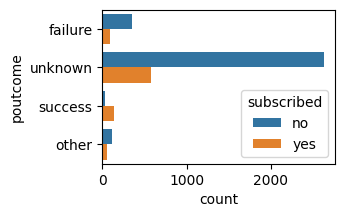

In [48]:
plt.figure(figsize=(3,2))
sns.countplot(data=df, y= df['poutcome'], hue='subscribed')

In [49]:
grouped_campaign_poutcome = subscribed_data.groupby(['poutcome'])['campaign']
grouped_campaign_poutcome.agg(['min','max','mean', 'count'])

,min,max,mean,count
poutcome,,,,
failure,1,8,1.916667,96
other,1,9,2.296296,54
success,1,7,1.666667,138
unknown,1,32,2.477431,576


##### There are 4 labels here - failure, success, unknown, other. The poutcome for 80% of data in the dataset is unknown i.e. has unknown label. Thus we can say that data available for this column is very poor.

8. Distribution of contact

In [50]:
df.contact.value_counts()

contact
cellular     2658
unknown      1076
telephone     266
Name: count, dtype: int64

In [51]:
subscribed_data.contact.value_counts()*100/len(subscribed_data)

contact
cellular     79.861111
unknown      12.268519
telephone     7.870370
Name: count, dtype: float64

<Axes: xlabel='count', ylabel='contact'>

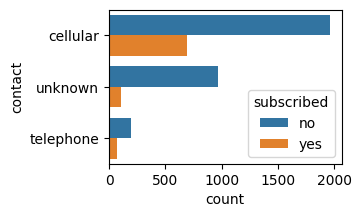

In [52]:
plt.figure(figsize=(3,2))
sns.countplot(data=df, y= df['contact'], hue='subscribed')

##### There are 3 ways of contact- cellular, telephone and last one is unknown method. People contacted on cell phone were most likely to subscribe to the product.

#### Plotting all the categorical features

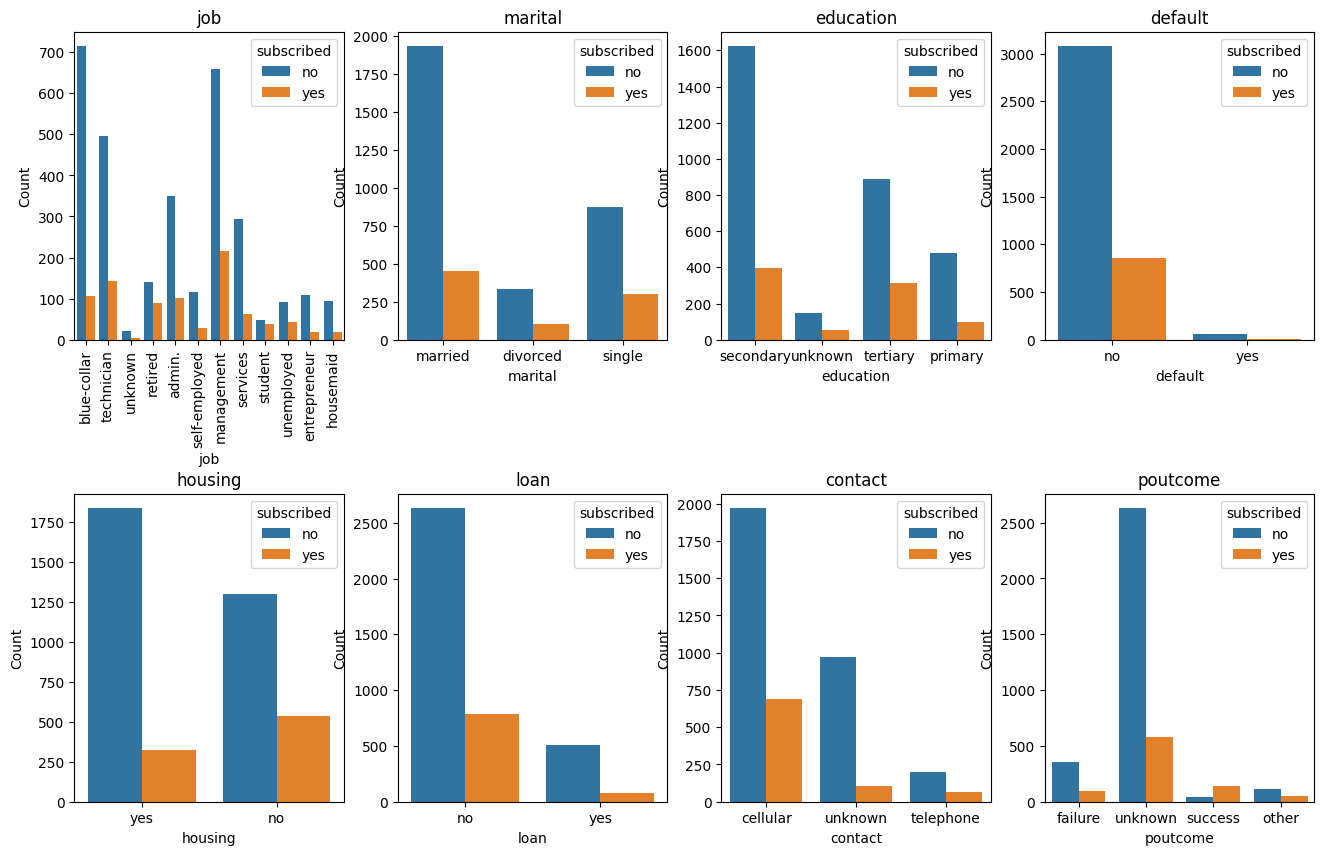

In [53]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16,10))
fig.subplots_adjust(hspace=0.5)
for i in range(len(categorical_columns)):
    #sns.countplot(x=categorical_columns[i], hue='subscribed', data=df, ax=axes[i])
    row, col = i // 4, i % 4
    ax = sns.countplot(x=categorical_columns[i],hue='subscribed', data=df, ax=axes[row, col])
    ax.set_title(f'{categorical_columns[i]}')
    ax.set_xlabel(categorical_columns[i])
    ax.set_ylabel('Count')
    if(categorical_columns[i] == 'job'):
        ax.tick_params(axis='x', rotation=90)


In [54]:
df['subscribed'] = [0 if x == 'no' else 1 for x in df['subscribed']]

#### Correlation Matrix

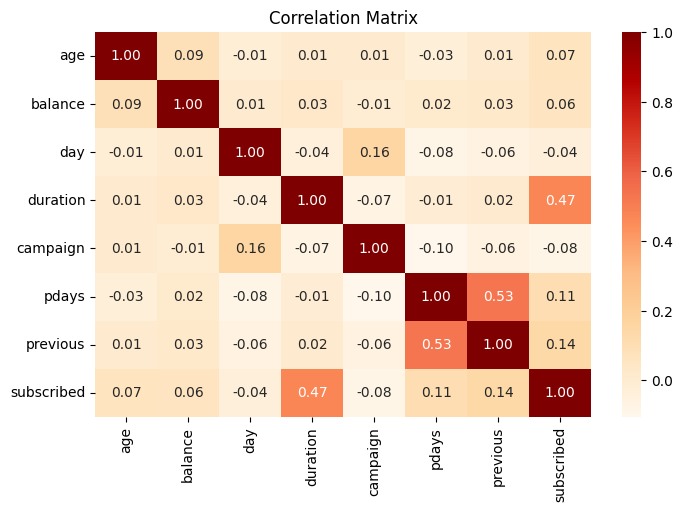

In [55]:
correlation_matrix = df.corr(numeric_only = True)
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='OrRd', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## 2. Data Exploration

In [56]:
df['subscribed'] = ['no' if x == 0 else 'yes' for x in df['subscribed']]

In [57]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,subscribed
0,37,blue-collar,married,secondary,no,342,yes,no,cellular,12,340,2,175,1,failure,no
1,53,technician,divorced,secondary,no,392,yes,no,cellular,28,70,1,245,1,failure,no
2,59,unknown,married,unknown,no,3940,no,no,unknown,5,48,2,-1,0,unknown,no
3,31,blue-collar,single,secondary,no,334,yes,yes,unknown,2,425,2,-1,0,unknown,no
4,74,retired,married,tertiary,no,1843,no,no,cellular,15,192,1,185,2,success,yes


In [58]:
df_input = df.drop('subscribed', axis=1)
df_output = df['subscribed']

In [59]:
df_input = pd.get_dummies(df_input,dtype=int)

In [60]:
#df_input.head(2)
df_input.shape

(4000, 39)

In [61]:
X = df_input
y = df_output

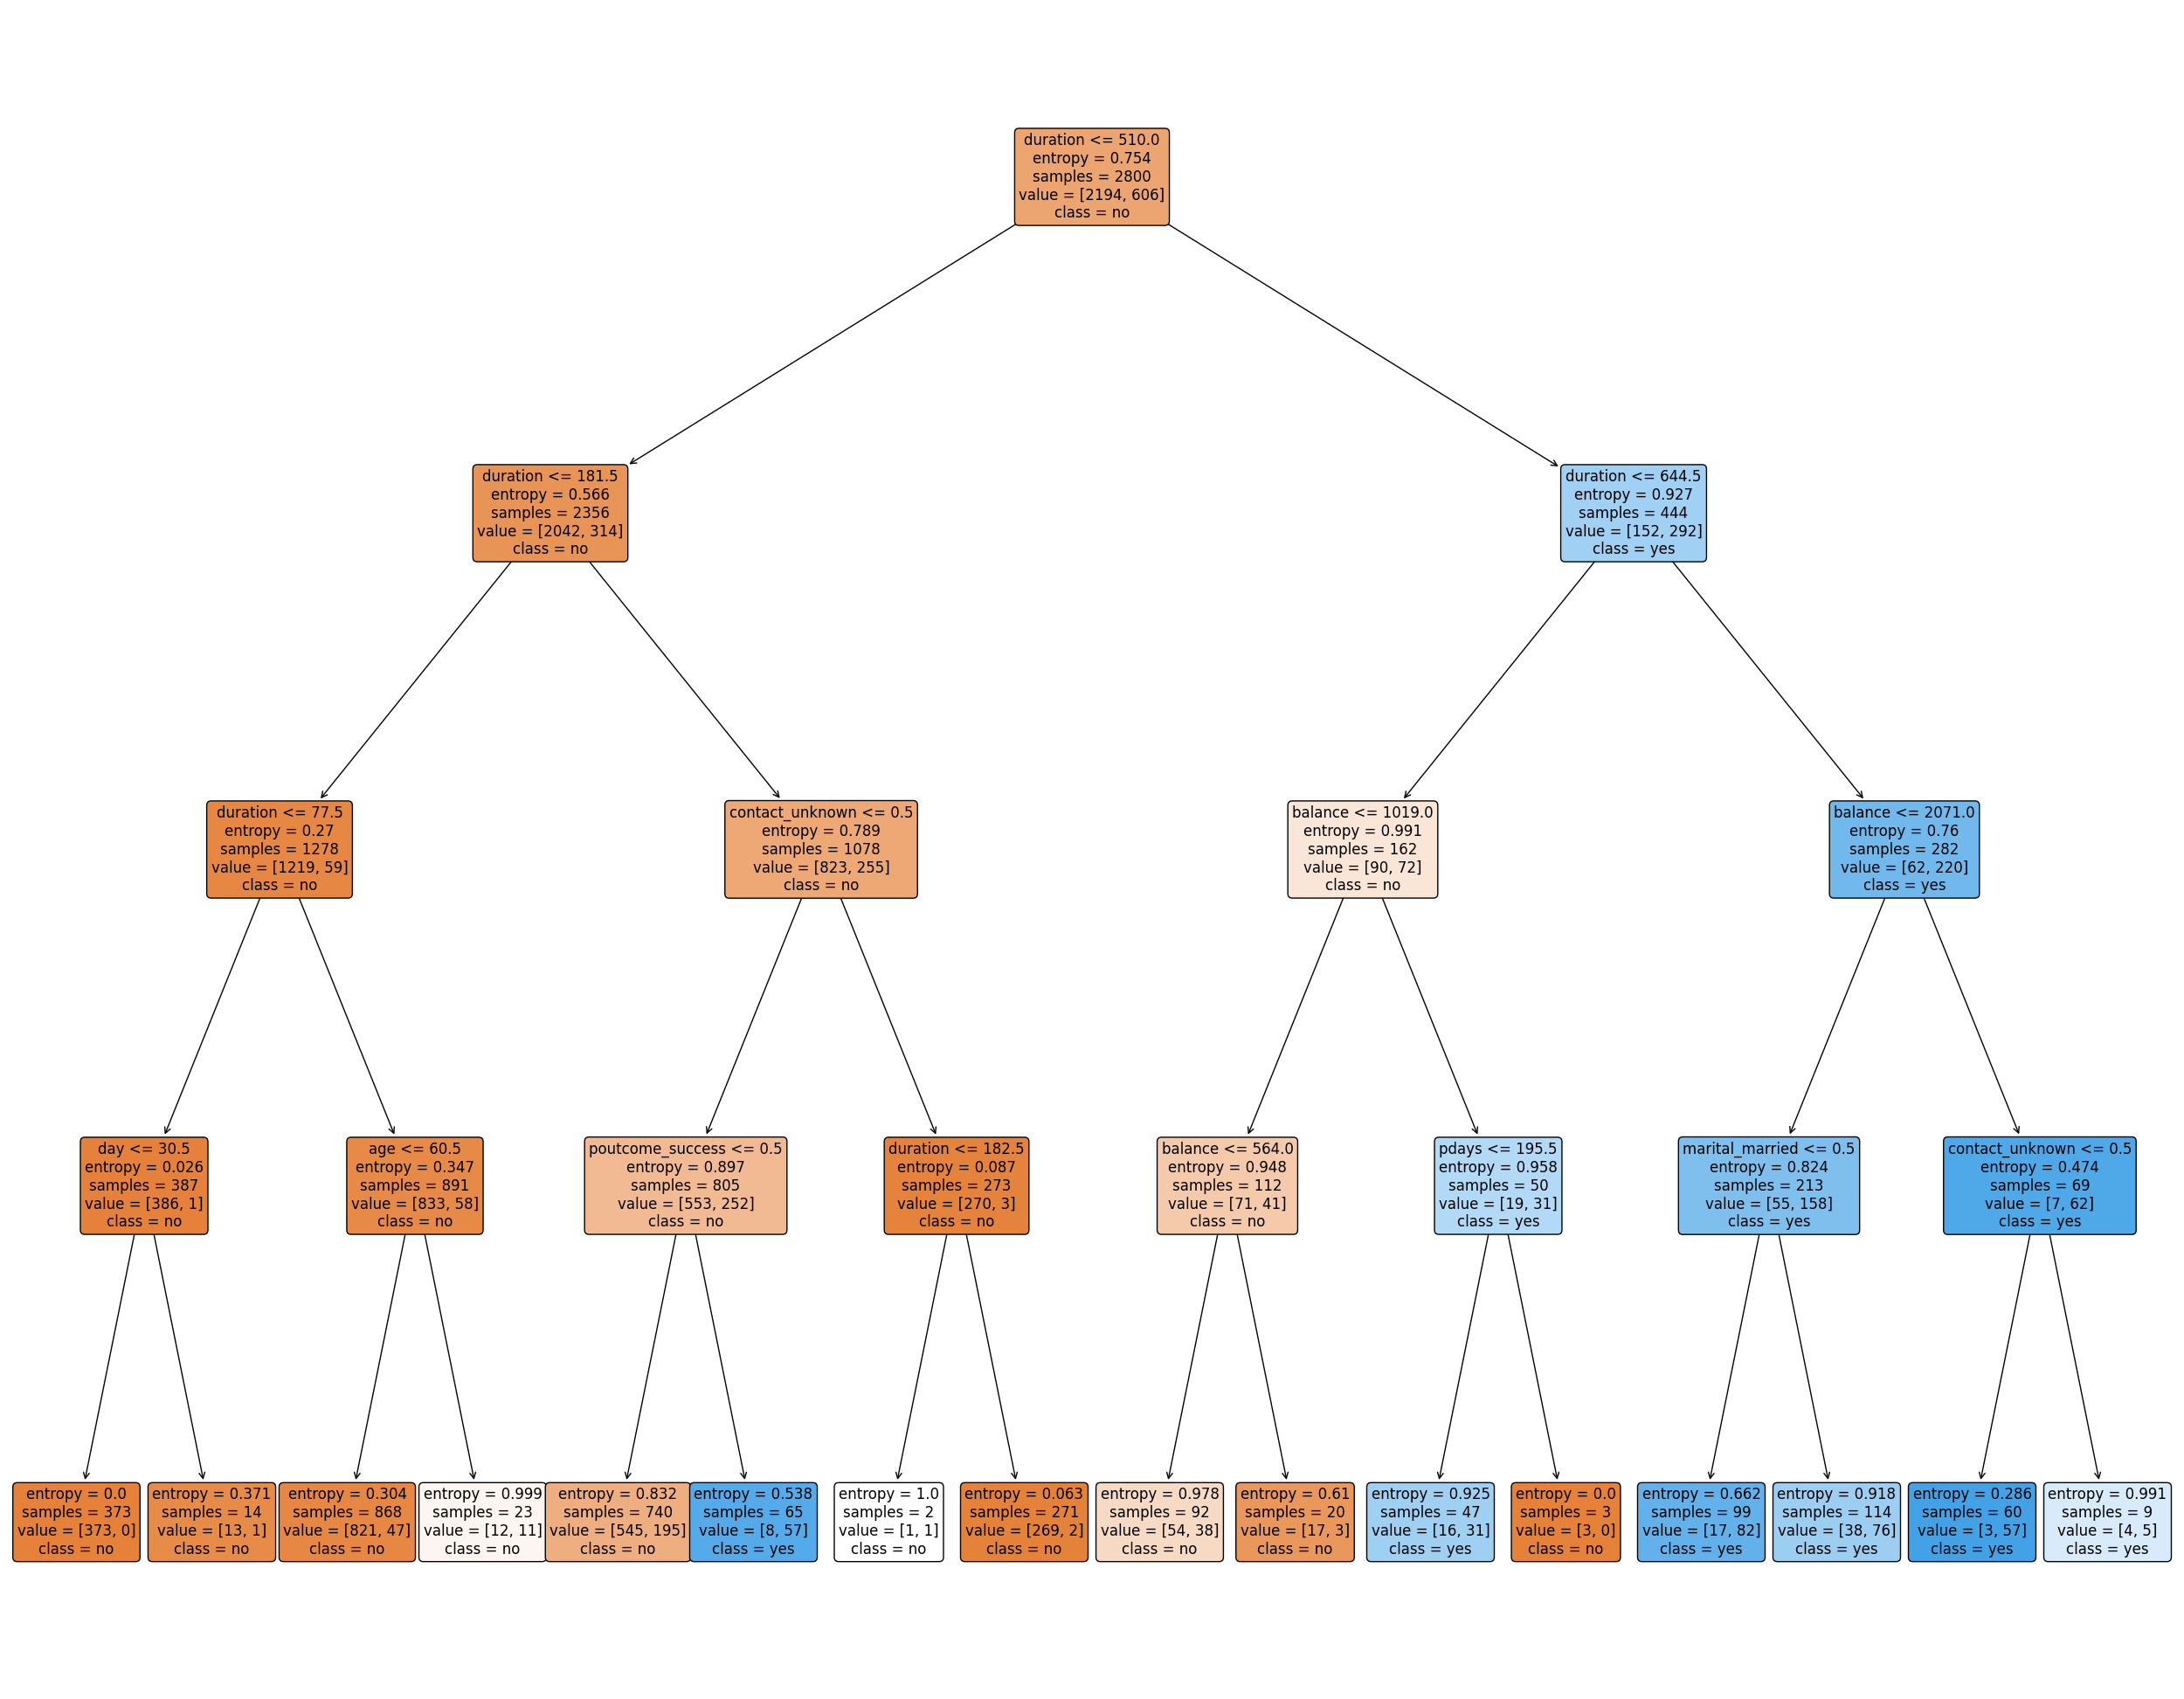

In [62]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training a Decision Tree model with max_depth set to 3
dt_model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, random_state=42)
dt_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(32,25))
plot_tree(dt_model, feature_names=X.columns, class_names=dt_model.classes_, filled=True, rounded=True,fontsize=12)
plt.savefig('decision_tree.png')
plt.show()

In [63]:
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]

# print feature ranking
print("Feature ranking:")

for i in range(X.shape[1]):
    print("%d. %s (%f)" % (i + 1, X.columns[indices[i]], importances[indices[i]]))

Feature ranking:
1. duration (0.706269)
2. contact_unknown (0.138554)
3. poutcome_success (0.088209)
4. age (0.028335)
5. balance (0.020543)
6. marital_married (0.006615)
7. day (0.006000)
8. pdays (0.005476)
9. job_management (0.000000)
10. job_student (0.000000)
11. job_services (0.000000)
12. job_self-employed (0.000000)
13. job_retired (0.000000)
14. job_blue-collar (0.000000)
15. job_housemaid (0.000000)
16. job_entrepreneur (0.000000)
17. job_unemployed (0.000000)
18. job_admin. (0.000000)
19. previous (0.000000)
20. campaign (0.000000)
21. job_technician (0.000000)
22. poutcome_unknown (0.000000)
23. job_unknown (0.000000)
24. housing_yes (0.000000)
25. poutcome_other (0.000000)
26. poutcome_failure (0.000000)
27. contact_telephone (0.000000)
28. contact_cellular (0.000000)
29. loan_yes (0.000000)
30. loan_no (0.000000)
31. housing_no (0.000000)
32. marital_single (0.000000)
33. default_yes (0.000000)
34. default_no (0.000000)
35. education_unknown (0.000000)
36. education_terti

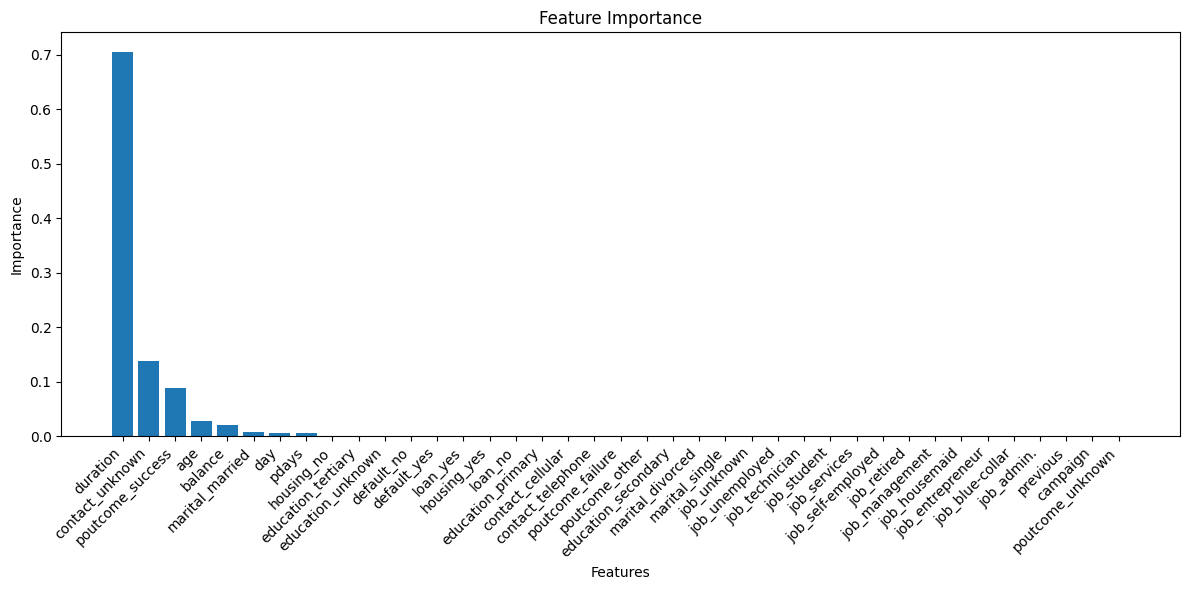

In [64]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig('feature_importance.png')
plt.show()